In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
data = pd.read_csv('../train.csv', index_col=2)  # set the data as index column (time series)
data.index = pd.to_datetime(data.index)  # convert date to datetime index
data['StateHoliday'].replace(0, "0",inplace=True)
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


-----


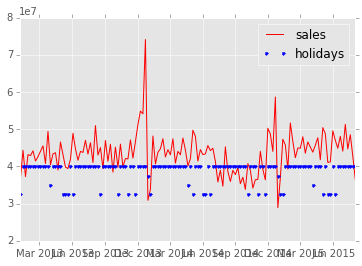

In [2]:
# show state holidays in function of date

holiday_filtred = data[['StateHoliday']]

def custom_resampler(array_like):
    if any(array_like=="c"):
        return "c"
    if any(array_like=="a"):
        return "a"
    if any(array_like=="b"):
        return "b"
    else:
        return array_like.value_counts().idxmax()
    
holiday_aggregated = holiday_filtred.resample('W-Mon', how=custom_resampler)
print '-----'

# merge between holiday aggregated and sales aggregated
sales_aggregated = data[['Sales']].resample('W-Mon',how='sum')
sales_holiday_aggregated = holiday_aggregated.join(sales_aggregated, how='inner')
sales_holiday_aggregated = sales_holiday_aggregated.replace({'StateHoliday' : { 'a' : 32500000, 'b' : 35000000, 'c' : 37500000,'0': 40000000 }}) # change letters to values to plot them
plt.plot_date(sales_holiday_aggregated.index, sales_holiday_aggregated.Sales,fmt="r-",label='sales')
plt.plot_date(sales_holiday_aggregated.index, sales_holiday_aggregated.StateHoliday,fmt="b.",label='holidays')
plt.legend()
plt.show()
#sales_holiday_aggregated.plot()


In [49]:
# join  store and train set

'''def convert_month_to_number(promo_intervall):
    #pdb.set_trace()
    splited_months = promo_intervall.split(',')
    
    promo_number = [w.replace('Jan', '1').replace('Apr','4').replace('Feb', '2').replace('Mar','3').replace('May','5').replace('Jun','6').replace('Jul','7').replace('Aug','8').replace('Sept','9').replace('Oct','10').replace('Nov','11').replace('Dec','12') for w in splited_months]
    
    
    #pdb.set_trace()
    return promo_number   '''

import pdb
data = pd.read_csv('../train.csv')
store_data = pd.read_csv('../store.csv')
joined_data = data.merge(store_data, on='Store')
joined_data = joined_data.set_index(['Date'])
joined_data.index = pd.to_datetime(joined_data.index)
joined_data['promo_indicator'] = 0
promo2_obs = joined_data[joined_data['Promo2']==1]
#promo2_obs = promo2_obs.set_index(['Date'])
promo2_obs.index = pd.to_datetime(promo2_obs.index)
joined_data.head(10)


#joined_data = data.join(store_data, on='Store',how='inner')

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,promo_indicator
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-30,1,4,5020,546,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-29,1,3,4782,523,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-28,1,2,5011,560,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-27,1,1,6102,612,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-26,1,7,0,0,0,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-25,1,6,4364,500,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-24,1,5,3706,459,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-23,1,4,3769,503,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-22,1,3,3464,463,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0


In [51]:
import pdb
import numpy as np
ObsvDate = joined_data.index
year =pd.DataFrame(pd.DatetimeIndex(ObsvDate).year)
month=pd.DataFrame(pd.DatetimeIndex(ObsvDate).month)
print type(month)

joined_data['month_extracted'] = pd.DatetimeIndex(ObsvDate).month
joined_data['year_extracted'] = pd.DatetimeIndex(ObsvDate).year
dates = joined_data.index.date #.isocalendar()
week_number = [ w.strftime("%W") for w in dates]
week_number = np.array(week_number)
joined_data['week_number_extracted'] = week_number
joined_data['isin'] =joined_data.apply(lambda row: str(row['month_extracted']) in str(row['PromoInterval']),axis=1)
#joined_data.loc[joined_data['Promo2']==1 & joined_data['week_number_extracted']>=joined_data['CompetitionOpenSinceYear'],'promo2_indicator']=30
joined_data.loc[(((joined_data['Promo2']==1) & (joined_data['year_extracted']>joined_data['month_extracted']) & (joined_data['isin']==True ))  | ((joined_data['Promo2']==1) & (joined_data['year_extracted']==joined_data['CompetitionOpenSinceYear'])  & (joined_data['week_number_extracted'] >= joined_data['Promo2SinceWeek'] ) & (joined_data['isin']==True)) )| (joined_data['Promo']==1),'promo_indicator' ]= 1

#test = joined_data[joined_data['promo2_indicator']==1]
joined_data[joined_data['promo_indicator']==1]

<class 'pandas.core.frame.DataFrame'>


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,promo_indicator,month_extracted,year_extracted,week_number_extracted,isin
2015-07-31,1,5,5263,555,1,1,0,1,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,30,False
2015-07-30,1,4,5020,546,1,1,0,1,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,30,False
2015-07-29,1,3,4782,523,1,1,0,1,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,30,False
2015-07-28,1,2,5011,560,1,1,0,1,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,30,False
2015-07-27,1,1,6102,612,1,1,0,1,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,30,False
2015-07-17,1,5,4852,519,1,1,0,0,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,28,False
2015-07-16,1,4,4427,517,1,1,0,0,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,28,False
2015-07-15,1,3,4767,550,1,1,0,0,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,28,False
2015-07-14,1,2,5042,544,1,1,0,0,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,28,False
2015-07-13,1,1,5054,553,1,1,0,0,c,a,...,2008,0,NaN,NaN,NaN,1,7,2015,28,False


# The selected explain variables are:

temporal dimension:
   - Calendar day of week: day of week. Maybe it's more useful than day of month
   - day of month: it's a local feature that capture sales per month (features: categorical 1 -> 31)
   - month of year: feature that capture sales per year (features: categorical 1 -> 12)
   - School holiday: binary indicator (1 if exists 0 if not)
   
store dimension:
   
   - store: it's carecterizes the store sales by itself (it could reflest some info about the store that are not included in the train file (in the city or rural area etc)) (features: 1 ->1116)
   - Competition distance: I don't know if we shoould include it or not at this point. If so we have to make buckets (near/far) or (near/Medium/far). Uniform binning or bucketization should be studied
   - Assortment: assortment reflects if the store can satisfy customers demand or not (deep and wide) http://www.investopedia.com/terms/a/assortment-strategy.asp. I don't know if we include it or not 
   - Store type: (1 -> 4) . We could partition data according to their store type and run ML over each type since store belonging to the same type share common patterns

store temporal dimension:
   
   - promo 1: feature that captures promo daily promo (features: categorical) easter,public,christmas,no_holiday)
   - promo 2: binary indicator (1 if observation occurs in continuous promo else 0)
   - Open: remove these observation (we will force test set observations to zero when store is closed). In the other side, including this column could harm to other coefficients

- Customers: remove that column since we do not have this information in the test set

==> at this point we have features 1+4+4+1116+12+31 = 1168





In [53]:


selected_features = joined_data[['DayOfWeek','month_extracted','Store','SchoolHoliday','StateHoliday','promo_indicator','StoreType']]
selected_features.tail()

,DayOfWeek,month_extracted,Store,SchoolHoliday,StateHoliday,promo_indicator,StoreType
2013-01-05,6,1,1115,1,0,1,d
2013-01-04,5,1,1115,1,0,1,d
2013-01-03,4,1,1115,1,0,1,d
2013-01-02,3,1,1115,1,0,1,d
2013-01-01,2,1,1115,1,a,1,d


In [54]:
import numpy
discretized_day_of_week = (joined_data.DayOfWeek.values[:,numpy.newaxis] == joined_data.DayOfWeek.unique()).astype(int)
discretized_month_of_year = (joined_data.month_extracted.values[:,numpy.newaxis] == joined_data.month_extracted.unique()).astype(int)
#discretized_Store = (joined_data.Store.values[:,numpy.newaxis] == joined_data.Store.unique()).astype(int)
#discretized_School_holiday = (joined_data.SchoolHoliday.values[:,numpy.newaxis] == joined_data.SchoolHoliday.unique()).astype(int)
discretized_StateHoliday = (joined_data.StateHoliday.values[:,numpy.newaxis] == joined_data.StateHoliday.unique()).astype(int)
discretized_StoreType = (joined_data.StoreType.values[:,numpy.newaxis] == joined_data.StoreType.unique()).astype(int)


print discretized_day_of_week.shape
print discretized_month_of_year.shape
print discretized_StateHoliday.shape
print discretized_StoreType.shape
X = np.concatenate((discretized_day_of_week, discretized_month_of_year,discretized_StateHoliday,discretized_StoreType,joined_data[['promo_indicator']].values,joined_data[['SchoolHoliday']].values), axis=1)
y = joined_data[['Sales']].values
print X.shape
print type(y)
print y.shape

(1017209, 7)
(1017209, 12)
(1017209, 5)
(1017209, 4)
(1017209, 30)
<type 'numpy.ndarray'>
(1017209, 1)


In [55]:
# coefficients generation

from sklearn import linear_model , preprocessing
import statsmodels.api as sm
from numpy import linalg as LA

#X_scaled = sm.add_constant(X_scaled)
linear = linear_model.LinearRegression(fit_intercept=True)
linear.fit(X,y)  # coefficients generation
y_hat = linear.predict(X)

joined_data['estimate']= y_hat

fitting_dataframe = joined_data[['Sales','estimate']]
fitting_dataframe.head()


,Sales,estimate
2015-07-31,5263,7545.062500
2015-07-30,5020,7246.070312
2015-07-29,4782,7190.250000
2015-07-28,5011,7521.226562
2015-07-27,6102,8592.382812


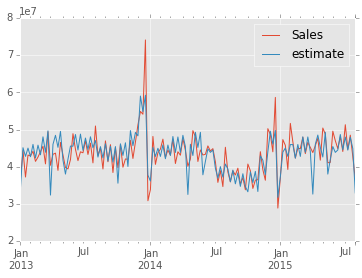

In [56]:
aggregated = fitting_dataframe[['Sales','estimate']].resample('W-Mon',how='sum')
aggregated.plot()

In [114]:
# forecast generation
test_data = pd.read_csv('../test.csv', index_col=0)  # set the data as index column (time series)
#test_data.index = pd.to_datetime(test_data.index)  # convert date to datetime index
test_data['StateHoliday'].replace(0, "0",inplace=True)
test_data = test_data.merge(store_data, on='Store')
test_data.head()


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN
1,1,3,2015-09-16,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN
2,1,2,2015-09-15,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN
3,1,1,2015-09-14,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN
4,1,7,2015-09-13,0,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN


In [94]:
# extract day of week and month of year
ObsvDate = test_data.Date.values

splitted_date = [ [int(pd.to_datetime(w).strftime("%W")),int(pd.to_datetime(w).strftime("%d")),int(pd.to_datetime(w).strftime("%m"))] for w in ObsvDate]
#splitted_date = np.reshape(splitted_date,41088,3)
splitted_date = np.array(splitted_date)

#test_data['day_extracted'] = splitted_date[:,1]
test_data['month_extracted'] = splitted_date[:,2]
test_data.head()

#week_number = np.array(week_number)
#joined_data['week_number_extracted'] = week_number

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month_extracted
0,1,4,2015-09-17,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9
1,1,3,2015-09-16,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9
2,1,2,2015-09-15,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9
3,1,1,2015-09-14,1,1,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9
4,1,7,2015-09-13,0,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,9


In [108]:
useful_data_test = test_data[['DayOfWeek','month_extracted','StateHoliday','StoreType','Promo','SchoolHoliday']]
useful_data_train = joined_data[['DayOfWeek','month_extracted','StateHoliday','StoreType','Promo','SchoolHoliday']] 
useful_data = useful_data_train.append(useful_data_test)
print useful_data_test.shape
print useful_data_train.shape
print useful_data.shape

discretized_day_of_week_test = (useful_data.DayOfWeek.values[:,numpy.newaxis] == useful_data.DayOfWeek.unique()).astype(int)[1017209:,:]
discretized_month_of_year_test = (useful_data.month_extracted.values[:,numpy.newaxis] == useful_data.month_extracted.unique()).astype(int)[1017209:,:]
#discretized_Store = (joined_data.Store.values[:,numpy.newaxis] == joined_data.Store.unique()).astype(int)
#discretized_School_holiday = (joined_data.SchoolHoliday.values[:,numpy.newaxis] == joined_data.SchoolHoliday.unique()).astype(int)
discretized_StateHoliday_test = (useful_data.StateHoliday.values[:,numpy.newaxis] == useful_data.StateHoliday.unique()).astype(int)[1017209:,:]
discretized_StoreType_test = (useful_data.StoreType.values[:,numpy.newaxis] == useful_data.StoreType.unique()).astype(int)[1017209:,:]


print discretized_day_of_week_test.shape
print discretized_month_of_year_test.shape
print discretized_StateHoliday_test.shape
print discretized_StoreType_test.shape
print useful_data[['Promo']].values[1017209:,:].shape
print useful_data[['SchoolHoliday']].values[1017209:,:].shape
X_test = np.concatenate((discretized_day_of_week_test, discretized_month_of_year_test,discretized_StateHoliday_test,discretized_StoreType_test,useful_data[['Promo']].values[1017209:,:],useful_data[['SchoolHoliday']].values[1017209:,:]), axis=1)

print X_test


(41088, 6)
(1017209, 6)
(1058297, 6)
(41088, 7)
(41088, 12)
(41088, 5)
(41088, 4)
(41088, 1)
(41088, 1)
[[0 1 0 ..., 0 1 0]
 [0 0 1 ..., 0 1 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 0 ..., 0 1 1]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]]


In [116]:
 
y_hat_test = linear.predict(X_test)
print len(y_hat_test)
test_data['estimate_test']= y_hat_test

fitting_dataframe_test = test_data[['Date','estimate_test']]
fitting_dataframe_test.index = pd.to_datetime(fitting_dataframe_test.Date)
fitting_dataframe_test.head()

41088


,Date,estimate_test
Date,,
2015-09-17,2015-09-17,6918.343750
2015-09-16,2015-09-16,6862.515625
2015-09-15,2015-09-15,7193.500000
2015-09-14,2015-09-14,8264.656250
2015-09-13,2015-09-13,-395.476562


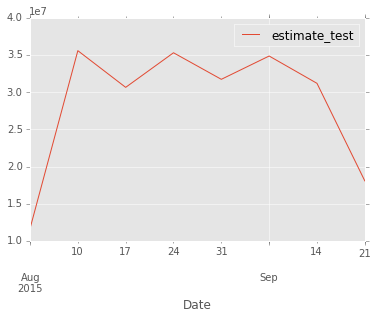

In [118]:
aggregated_test = fitting_dataframe_test[['estimate_test']].resample('W-Mon',how='sum')
aggregated_test.plot()

In [20]:
#joined_data = joined_data.tail(2000)
import time
i = 0
t_start = time.time()
row_iterator = joined_data.iterrows()
for row in row_iterator:
   
    #pdb.set_trace()
    if row[1]['Promo2'] == 1:    # if promo_2 exists
        
        date = row[0]     # select the year and the month from the date
        obs_year = date.strftime("%Y")
        obs_week_number = date.strftime("%W")
        obs_month_number = date.strftime("%m")
        year_start_promo = row[1]['Promo2SinceYear']
        week_start_promo = row[1]['Promo2SinceWeek']
        PromoInterval = row[1]['PromoInterval']
        month_promo = convert_month_to_number(PromoInterval)
        if (obs_year > year_start_promo):
            # add promo2 indicator 1
            if obs_month_number in month_promo:
               
                #joined_data.loc[row[0], 'promo2_indicator'] = 1
                #pdb.set_trace()
                #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  1
                #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 1
                joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 1
            else:
                
                #joined_data.loc[row[0], 'promo2_indicator'] = 0
                #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] = 0
                #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0
                joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
        elif (obs_year == year_start_promo):
            if (obs_week_number >= week_start_promo):
                # add promo2 indicator 1
                if obs_month_number in month_promo:
                    
                    #joined_data.loc[row[0], 'promo2_indicator'] = 1
                    #pdb.set_trace()
                    #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  1
                    #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 1
                    joined_data.loc[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 1
                else:
                    
                    #joined_data.loc[row[0], 'promo2_indicator'] = 0
                    #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  0
                    #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0
                    joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
            else:
                
                # add promo2 indicator 0
                #joined_data.loc[row[0], 'promo2_indicator'] = 0
                #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  0
                #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0
                joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
        else:
            
            # add promo2 indicator 0
            #joined_data.loc[row[0], 'promo2_indicator'] = 0
            #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  0
            #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0 
            joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
    if row[1]['Promo2'] == 0:
        # add promo2 indicator 0 
        #pdb.set_trace()
        #row[1].ix[17]=0
        #joined_data[joined_data['Store']== row[1][0]
        #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0
        joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
        

t_end = time.time()
elapsed_time = t_start - t_end
print 'elapsed time is ' + str(elapsed_time) 
joined_data['2015-06-30']


KeyboardInterrupt: 

In [13]:
#joined_data = joined_data.tail(2000)
import time
t_start = time.time()

i = 0
joined_data['dup_date'] = joined_data.index
promo2_obs['dup_date'] = promo2_obs.index
def calculate(s):
    pdb.set_trace()
    global i
    date = s['dup_date']
    if s['Promo2'] == 1:    # if promo_2 exists
        
        date = s['dup_date']     # select the year and the month from the date
        obs_year = date.strftime("%Y")
        obs_week_number = date.strftime("%W")
        obs_month_number = date.strftime("%m")
        year_start_promo = s['Promo2SinceYear']
        week_start_promo = s['Promo2SinceWeek']
        PromoInterval = s['PromoInterval']
        month_promo = convert_month_to_number(PromoInterval)
        if (obs_year > year_start_promo):
            # add promo2 indicator 1
            if obs_month_number in month_promo:

                joined_data.ix[(joined_data.index==date) & (joined_data.Store==s['Store']), 'promo2_indicator'] = 1
                
        elif (obs_year == year_start_promo):
            if (obs_week_number >= week_start_promo):
                # add promo2 indicator 1
                if obs_month_number in month_promo:
                    joined_data.ix[(joined_data.index==date) & (joined_data.Store==s['Store']), 'promo2_indicator'] = 1
                    
        

#joined_data.applymap(calculate, axis=1)
#joined_data.apply(calculate, axis=1)
joined_data.apply(calculate)
#t_end = time.time()
#elapsed_time = t_start - t_end
#print 'elapsed time is pri ' + str(elapsed_time) 
promo2_obs['2015-06-30']


/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


> <ipython-input-13-5ce172368cab>(11)calculate()
-> date = s['dup_date']


KeyboardInterrupt: 

In [33]:
t_start = time.time()
t_end = time.time()
elapsed_time = t_end - t_start
print 'elapsed time is ' + str(elapsed_time) 


elapsed time is 8.29696655273e-05


In [4]:

def sales_of_date(date):
    date_sales = pd.DataFrame(date_vs_sales.ix[date])   #example '2015-07-31' and pass time series
    total_daily_sales = date_sales.sum()
    stores_sailing = date_vs_sales.size
    return (date_sales,stores_sailing,total_daily_sales)

date_sale,stores_sailing,total_daily_sales = sales_of_date('2015-07-31')
print stores_sailing
print total_daily_sales

1017209
Sales    10109742
dtype: int64


In [5]:
# repartition of train set between the national holidays and normal days

data = pd.read_csv('train.csv', index_col=2)  # set the data as index column (time series)
data.index = pd.to_datetime(data.index)  # conve

normal_sales = data[data['StateHoliday'].isin(["0",0])]
a_sales = data[data['StateHoliday']=='a']
b_sales = data[data['StateHoliday']=='b']
c_sales = data[data['StateHoliday']=='c']
#rest_sales = data[~data['StateHoliday'].isin([0,"0","a","b","c"])]
#print "len rest sales is: %f" %len(rest_sales)
print "normal sales observations are: %s public holiday observations are: %s Easter holiday observations are: %s Christmas observations are: %s " %(len(normal_sales),len(a_sales),len(b_sales),len(c_sales))




normal sales observations are: 986159 public holiday observations are: 20260 Easter holiday observations are: 6690 Christmas observations are: 4100 


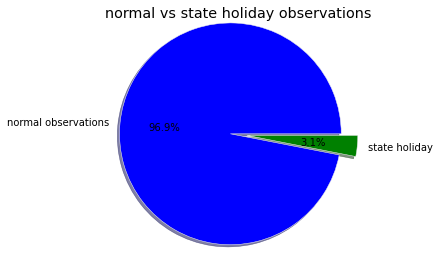

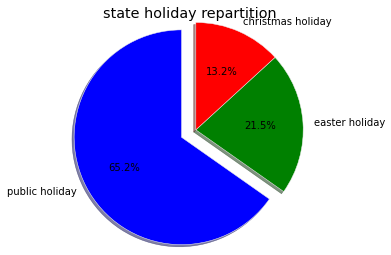

In [6]:
name = ['normal observations','state holiday']
data_plot = [len(normal_sales),len(a_sales)+len(b_sales)+len(c_sales)]

explode=(0.15, 0)
plt.pie(data_plot, explode=explode, labels=name, autopct='%1.1f%%', startangle=0, shadow=True)
plt.axis('equal')
plt.title('normal vs state holiday observations')
plt.show()

name = ['public holiday ', 'easter holiday', 'christmas holiday']
data_plot = [a_sales.size,b_sales.size,c_sales.size]
explode=(0.15, 0,0)
plt.pie(data_plot, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('state holiday repartition')
plt.show()

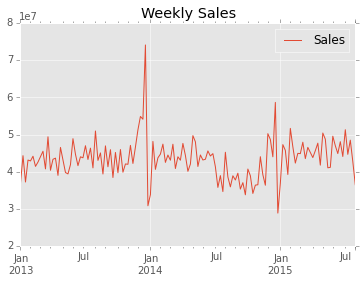

,Sales
2013-01-07,36956183
2013-01-14,44335162
2013-01-21,37252051
2013-01-28,43157797
2013-02-04,42920978


In [7]:
# plot weekly sales

date_vs_sales_aggregated = date_vs_sales.resample('W-MON',how='sum')
date_vs_sales_aggregated.plot()
plt.title("Weekly Sales")
plt.show()
date_vs_sales_aggregated.head()


the week aggregation is defined by the aggregation of observations starting from the week before the displayed week until the displayed week

In [8]:
# construct promo_2 observations

stores_data = pd.read_csv('store.csv')  # set the data as index column (time series)
stores_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [9]:
# select rows that have promo 2
#import re
import datetime
stores_data_promo_2 = stores_data[stores_data['Promo2']==1]

stores_data_promo_2['Promo2SinceWeek'] = stores_data_promo_2['Promo2SinceWeek'].astype(str)
print stores_data_promo_2['Promo2SinceWeek'][1]

def func(array_like):
    if len(array_like)==3:
        array_like = "0"+array_like
        return array_like
    else:
        return array_like
        
stores_data_promo_2['Promo2SinceWeek'] = stores_data_promo_2['Promo2SinceWeek'].apply(func)

stores_data_promo_2['start_promo'] = stores_data_promo_2.Promo2SinceYear.map(str) + "-W"+stores_data_promo_2.Promo2SinceWeek.map(str)+'-1'     

stores_data_promo_2['start_promo'].replace(to_replace='(\.)(0)',value='',inplace=True,regex=True)
print stores_data_promo_2.start_promo.values[0]
stores_data_promo_2.start_promo = pd.to_datetime(stores_data_promo_2.start_promo, format="%Y-W%W-%w")   #Y:year,W:week number,w:week day of the week(monday)
print type(stores_data_promo_2.start_promo.values[0])
stores_data_promo_2.head()


/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pyd

13.0
2010-W13-1
<type 'numpy.datetime64'>


/home/khalil/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2859: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/khalil/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,start_promo
1,2,a,a,570,11,2007,1,13.0,2010,"Jan,Apr,Jul,Oct",2010-03-29
2,3,a,a,14130,12,2006,1,14.0,2011,"Jan,Apr,Jul,Oct",2011-04-04
10,11,a,c,960,11,2011,1,01.0,2012,"Jan,Apr,Jul,Oct",2012-01-02
11,12,a,c,1070,NaN,NaN,1,13.0,2010,"Jan,Apr,Jul,Oct",2010-03-29
12,13,d,a,310,NaN,NaN,1,45.0,2009,"Feb,May,Aug,Nov",2009-11-09


In [23]:
# construct the promo days per store
import pdb
import numpy as np
def PromoInterval_func(array_like):
    #pdb.set_trace()
    splited_months = array_like.split(',')
    
    words = [w.replace('Jan', '01').replace('Apr','04').replace('Feb', '02').replace('Mar','03').replace('May','05').replace('Jun','06').replace('Jul','07').replace('Aug','08').replace('Sept','09').replace('Oct','10').replace('Nov','11').replace('Dec','12') for w in splited_months]
    
    
    #pdb.set_trace()
    return words
    
PromoInterval_splitted = stores_data_promo_2.PromoInterval.apply(PromoInterval_func)
print PromoInterval_splitted





1       [01, 04, 07, 10]
2       [01, 04, 07, 10]
10      [01, 04, 07, 10]
11      [01, 04, 07, 10]
12      [02, 05, 08, 11]
13      [01, 04, 07, 10]
14      [01, 04, 07, 10]
16      [01, 04, 07, 10]
17      [01, 04, 07, 10]
18      [03, 06, 09, 12]
19      [01, 04, 07, 10]
20      [01, 04, 07, 10]
21      [01, 04, 07, 10]
23      [01, 04, 07, 10]
26      [01, 04, 07, 10]
27      [03, 06, 09, 12]
29      [03, 06, 09, 12]
31      [02, 05, 08, 11]
34      [01, 04, 07, 10]
35      [01, 04, 07, 10]
38      [02, 05, 08, 11]
39      [02, 05, 08, 11]
40      [01, 04, 07, 10]
41      [01, 04, 07, 10]
42      [01, 04, 07, 10]
45      [01, 04, 07, 10]
46      [01, 04, 07, 10]
50      [01, 04, 07, 10]
51      [01, 04, 07, 10]
53      [02, 05, 08, 11]
              ...       
1068    [01, 04, 07, 10]
1070    [03, 06, 09, 12]
1071    [02, 05, 08, 11]
1072    [01, 04, 07, 10]
1073    [01, 04, 07, 10]
1075    [01, 04, 07, 10]
1076    [03, 06, 09, 12]
1077    [01, 04, 07, 10]
1078    [01, 04, 07, 10]
